In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


![Clustering Algorithm Infographics](https://miro.medium.com/max/1400/1*xCKGM7tUzoR53oFv4yTPWA.png)  
This notebook provides a step by step guide to implement Clustering Algorithms for Customer Segmentation. Please visit [Clustering Algorithm for Customer Segmentation](https://towardsdatascience.com/clustering-algorithm-for-customer-segmentation-e2d79e28cbc3) for detailed walkthrough.

In [2]:
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

df = pd.read_csv("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.shape

(200, 5)

In [7]:
# populate list of numerical and categorical variables
num_list = []
cat_list = []

for column in df:
    if is_numeric_dtype(df[column]):
        num_list.append(column)
    elif is_string_dtype(df[column]):
        cat_list.append(column)
        

print("numeric:", num_list)
print("categorical:", cat_list)

numeric: ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
categorical: ['Gender']


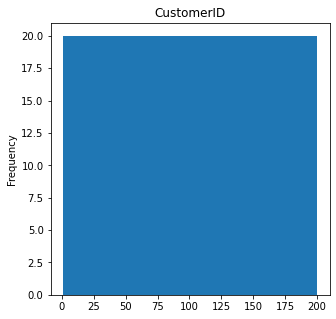

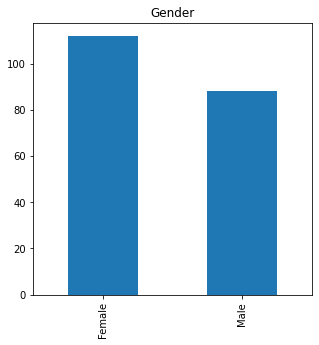

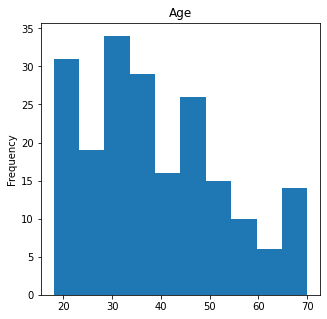

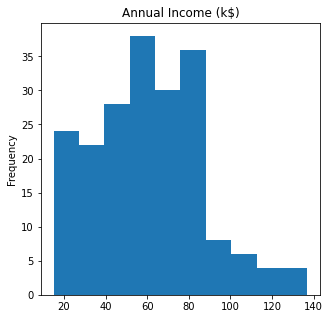

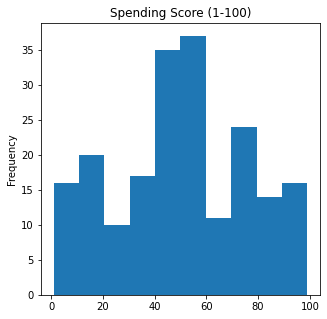

In [8]:
for column in df:
    plt.figure(column, figsize = (5,5))
    plt.title(column)
    if is_numeric_dtype(df[column]):
        df[column].plot(kind = 'hist')
    elif is_string_dtype(df[column]):
        # show only the TOP 10 value count in each categorical data
        df[column].value_counts()[:10].plot(kind = 'bar')

# Data Preprocessing
* data transformation through scaling and standardization
* categorical data encoding

In [9]:
# encoding categorical variable
from sklearn.preprocessing import LabelEncoder

df['Gender'] = LabelEncoder().fit_transform(df["Gender"])
df = df.drop("CustomerID", axis = 1)

In [10]:
# data transformation - scikit learn scaler
# note that data transformation model should be trained using train dataset only and then apply to both train and test set

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


def data_scaler(scaler, var):
    scaled_var = "scaled_" + var
    model = scaler.fit(df[var].values.reshape(-1,1))
    df[scaled_var] = model.transform(df[var].values.reshape(-1, 1))
    
    plt.figure(figsize = (5,5))
    plt.title(scaled_var)
    df[scaled_var].plot(kind = 'hist')
    
    plt.figure(figsize = (5,5))
    plt.title(var)
    df[var].plot(kind = 'hist')

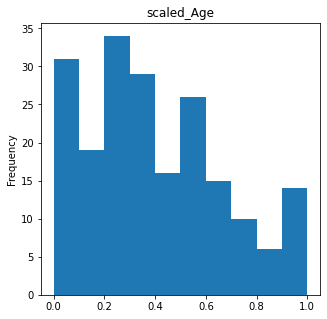

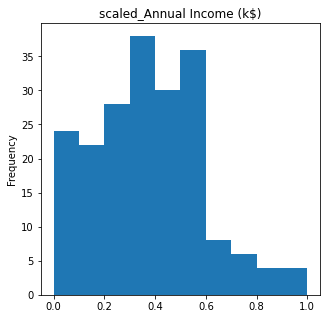

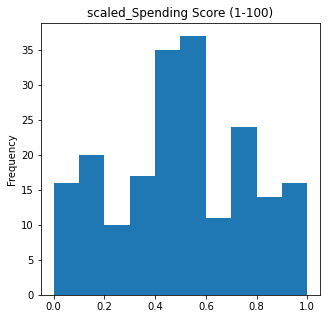

In [11]:
# transform data into the standard scale

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for var in ["Age", "Annual Income (k$)",'Spending Score (1-100)']:
    scaled_var = "scaled_" + var
    model = scaler.fit(df[var].values.reshape(-1,1))
    df[scaled_var] = model.transform(df[var].values.reshape(-1, 1))
    
    plt.figure(figsize = (5,5))
    plt.title(scaled_var)
    df[scaled_var].plot(kind = 'hist')

In [12]:
print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  scaled_Age  \
0       1   19                  15                      39    0.019231   
1       1   21                  15                      81    0.057692   
2       0   20                  16                       6    0.038462   
3       0   23                  16                      77    0.096154   
4       0   31                  17                      40    0.250000   

   scaled_Annual Income (k$)  scaled_Spending Score (1-100)  
0                   0.000000                       0.387755  
1                   0.000000                       0.816327  
2                   0.008197                       0.051020  
3                   0.008197                       0.775510  
4                   0.016393                       0.397959  


# Exploratory Data Analysis

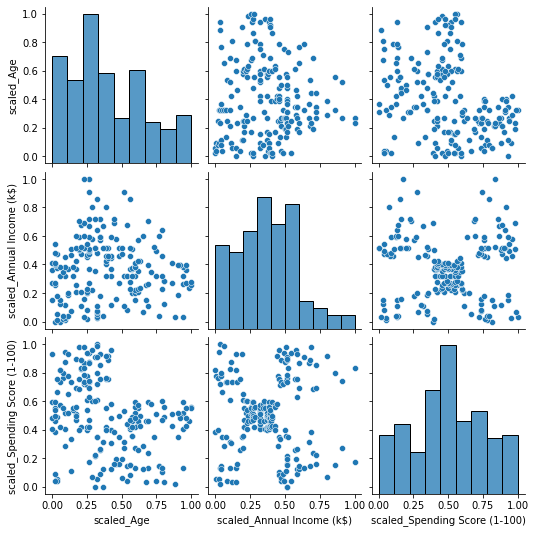

In [13]:
# 2D scatter plot
import seaborn as sns
columns = ["scaled_Age","scaled_Annual Income (k$)", "scaled_Spending Score (1-100)"]
sns.pairplot(df[columns])

Text(0.5, 0, 'scaled_Spending Score (1-100)')

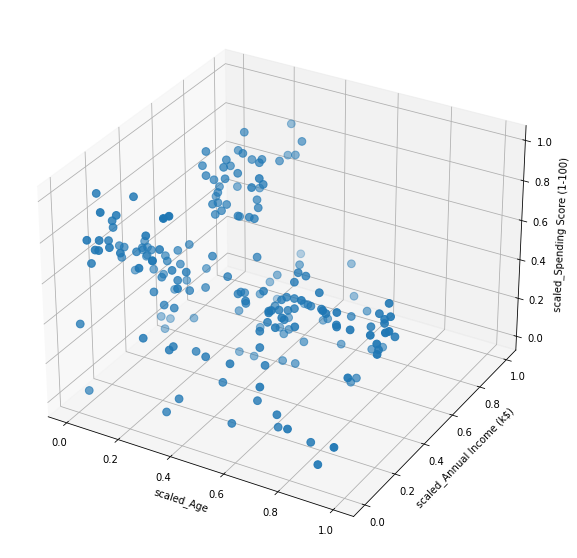

In [14]:
# 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


axis_list = ["scaled_Age", "scaled_Annual Income (k$)",'scaled_Spending Score (1-100)']
x, y, z = axis_list

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = "3d")
sc = ax.scatter(df[x], df[y], df[z], s = 60)
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)

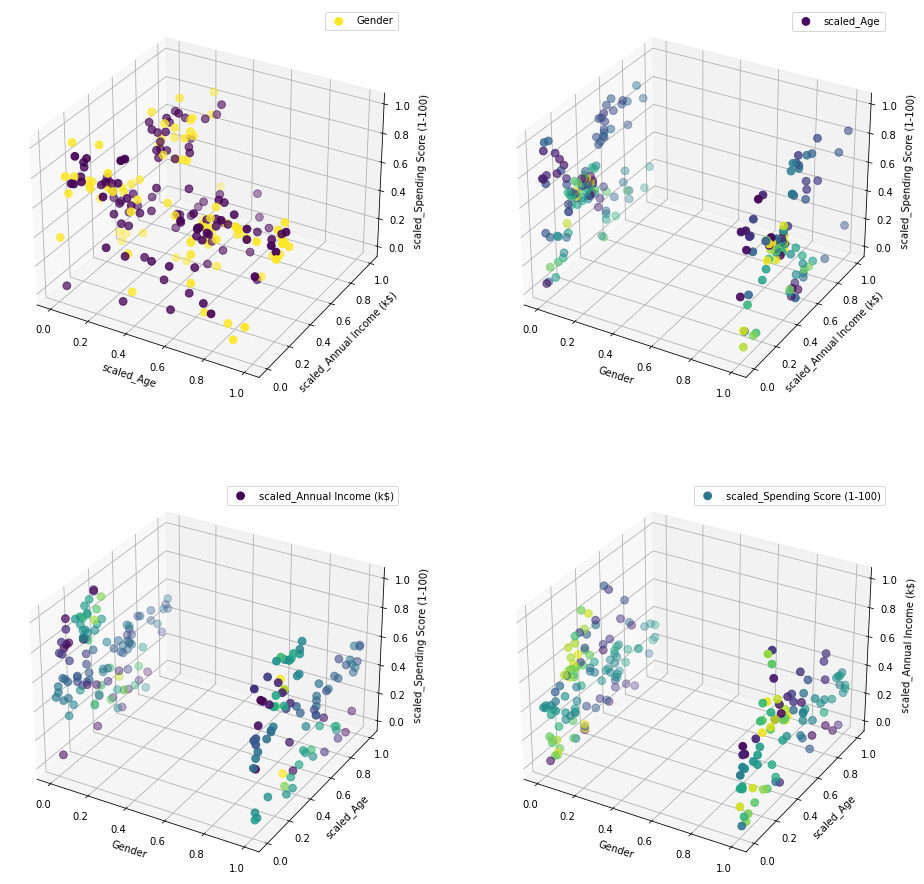

In [15]:
# 3D scatter plot with color
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,16))
variables_list = ["Gender", "scaled_Age", "scaled_Annual Income (k$)",'scaled_Spending Score (1-100)']

for i in range(len(variables_list)):
    axis_list = ["Gender", "scaled_Age", "scaled_Annual Income (k$)",'scaled_Spending Score (1-100)']
    legend = variables_list[i]
    axis_list.pop(i)
    x, y, z = axis_list
    
    ax = fig.add_subplot(221 + i, projection='3d') # define the position of the 3D plot
    sc = ax.scatter(df[x], df[y], df[z], s = 60, c = df[legend], label = variables_list[i])
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    ax.legend()
    

# K Means Clustering

In [16]:
# Spending vs. Age
X1 = df[["scaled_Age", "scaled_Spending Score (1-100)"]].values

# Spending vs. Annual Income
X2 = df[["scaled_Annual Income (k$)", "scaled_Spending Score (1-100)"]].values

# Spending vs. Age vs. Annual Income
X3 = df[["scaled_Age", "scaled_Annual Income (k$)", "scaled_Spending Score (1-100)"]].values


In [17]:
# define K means algorithm function that return inertia, label, centroids and silhouetee score

from sklearn.cluster import KMeans
from sklearn import metrics

def KMeans_Algorithm(dataset, n):
    clustering_KMeans = KMeans(n_clusters= n,init='k-means++', max_iter=300, random_state=0, algorithm = "elkan")
    clustering_KMeans.fit(dataset)
    
    # create data frame to store centroids
    centroids  = clustering_KMeans.cluster_centers_
    
    # add cluster label for each data point
    label = clustering_KMeans.labels_
    df["label"] = label
    
    # evaluation metrics for clustering - inertia and silhouette score
    inertia = clustering_KMeans.inertia_
    silhouette_score = metrics.silhouette_score(dataset, label)
    
    return inertia, label, centroids, silhouette_score

Text(0, 0.5, 'Silhouette Score')

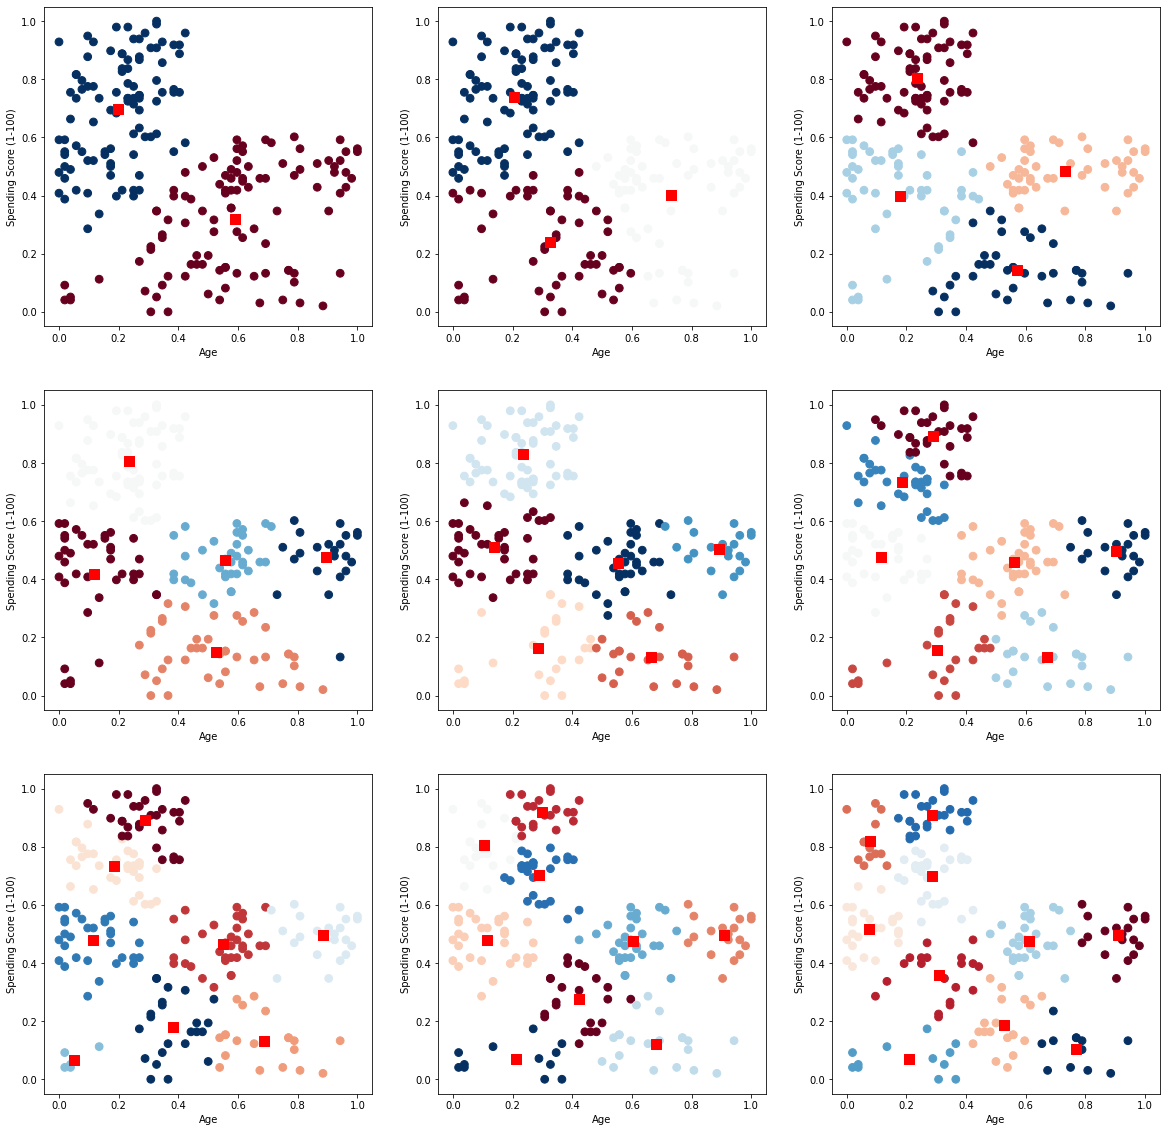

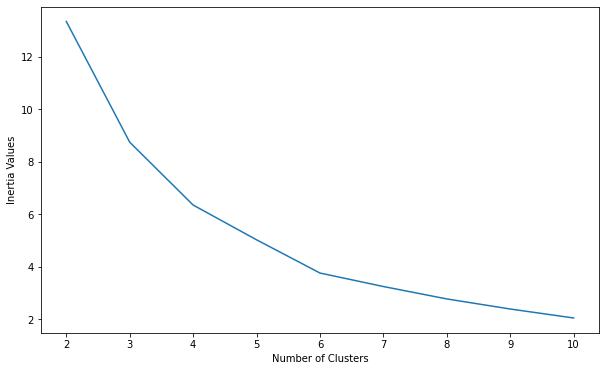

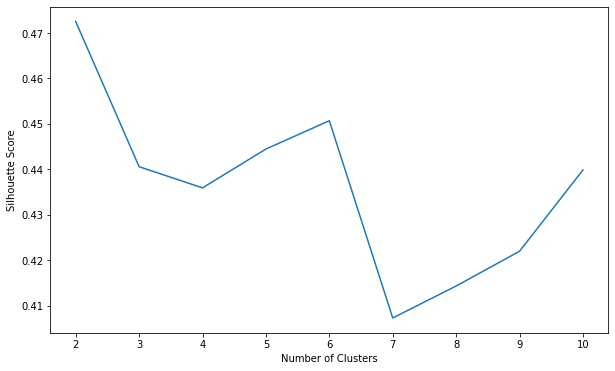

In [18]:
# Spending Score vs. Age by different numbers of clusters
X1_inertia_values = []
X1_silhouette_scores = []
fig1 = plt.figure(figsize=(20,20))
for i in range (2,11):
    X1_inertia, X1_label, X1_centroids, X1_silhouette = KMeans_Algorithm(X1, i)
    X1_inertia_values.append(X1_inertia)
    X1_silhouette_scores.append(X1_silhouette)
    centroids_df = pd.DataFrame(X1_centroids, columns =['X', 'Y'])
    
    sub = fig1.add_subplot(330 + i - 1)
    sub.scatter(df["scaled_Age"], df["scaled_Spending Score (1-100)"], s = 60, c = df["label"], cmap = "RdBu")
    sub.scatter(centroids_df['X'], centroids_df['Y'], s = 90, marker= ",", color = "r")
    sub.set_xlabel("Age")
    sub.set_ylabel("Spending Score (1-100)")
    

# plot inertia values against number of clusters
plt.figure(figsize = (10 ,6))
plt.plot(np.arange(2,11) , X1_inertia_values )
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Values")

# plot silhouette scores against number of clusters
plt.figure(figsize=(10,6))
plt.plot(np.arange(2,11), X1_silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
    

Text(0, 0.5, 'Silhouette Score')

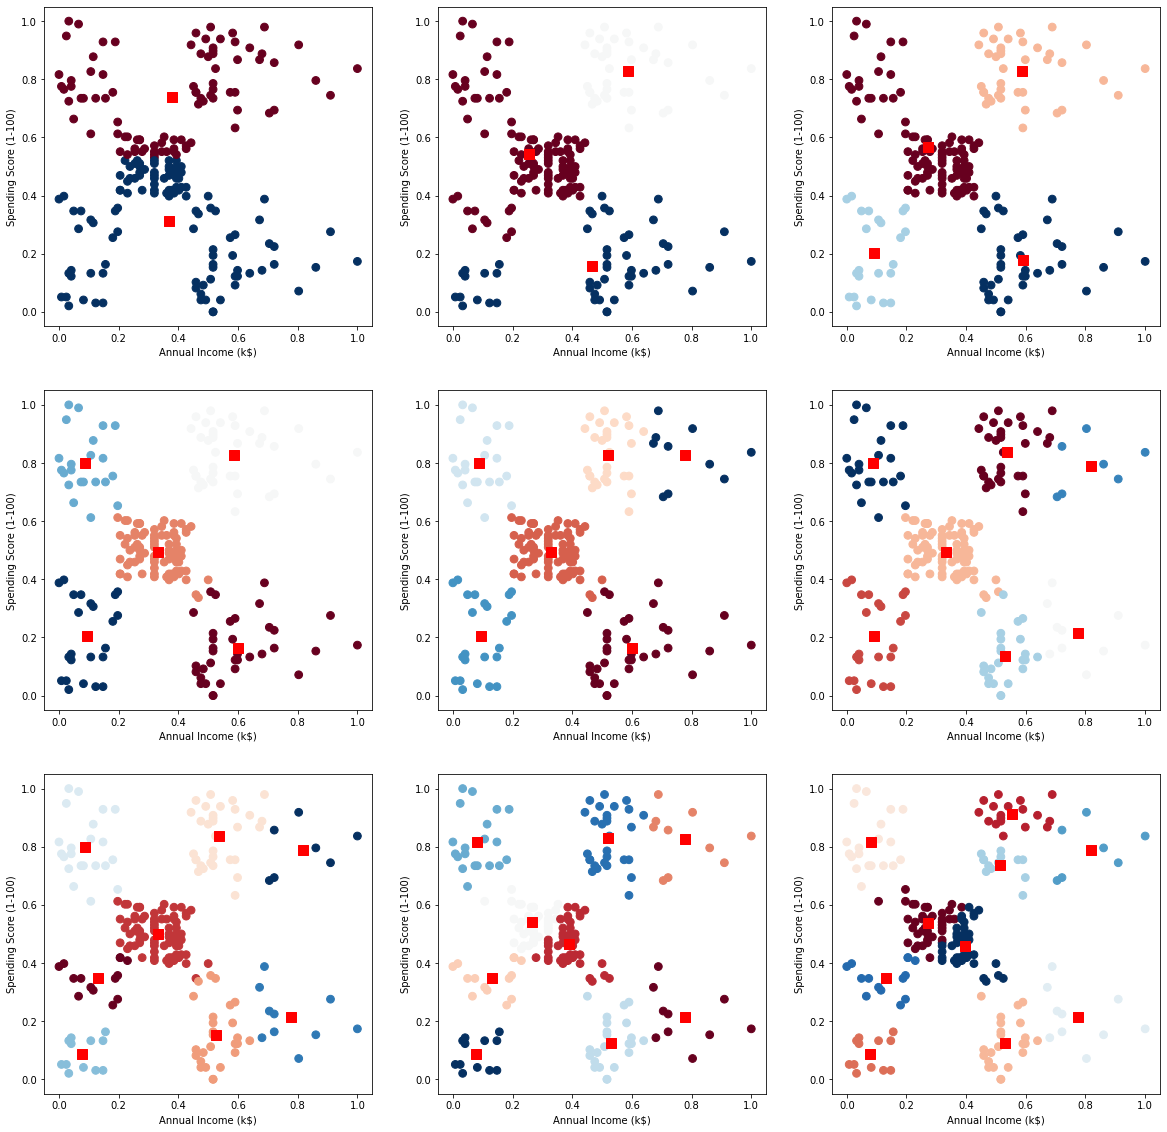

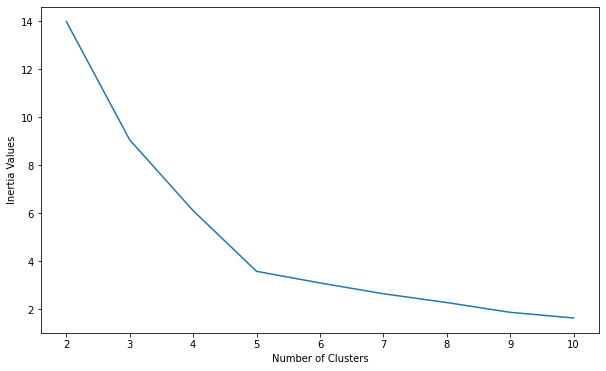

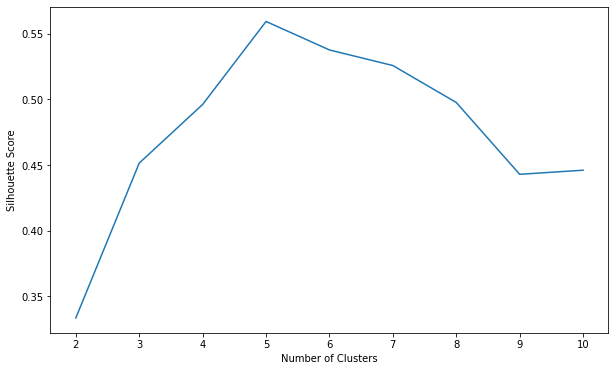

In [19]:
# Spending Score vs. Annual Income by different numbers of clusters
X2_inertia_values = []
X2_silhouette_scores = []
fig2 = plt.figure(figsize=(20,20))
for i in range (2,11):
    X2_inertia, X2_label, X2_centroids, X2_silhouette  = KMeans_Algorithm(X2, i)
    X2_inertia_values.append(X2_inertia)
    X2_silhouette_scores.append(X2_silhouette)
    centroids_df = pd.DataFrame(X2_centroids, columns =['X', 'Y'])
    sub = fig2.add_subplot(330 + i - 1)
    sub.scatter(df["scaled_Annual Income (k$)"], df["scaled_Spending Score (1-100)"], s = 60, c = df["label"], cmap = "RdBu")
    sub.scatter(centroids_df['X'], centroids_df['Y'], s = 90, marker= ",", color = "r")
    sub.set_xlabel("Annual Income (k$)")
    sub.set_ylabel("Spending Score (1-100)")
    

# plot inertia values against number of clusters
plt.figure(figsize = (10 ,6))
plt.plot(np.arange(2, 11) , X2_inertia_values , '-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Values")

# plot inertia values against number of clusters
plt.figure(figsize=(10,6))
plt.plot(np.arange(2,11) , X2_silhouette_scores, '-')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

Text(0, 0.5, 'Silhouette Score')

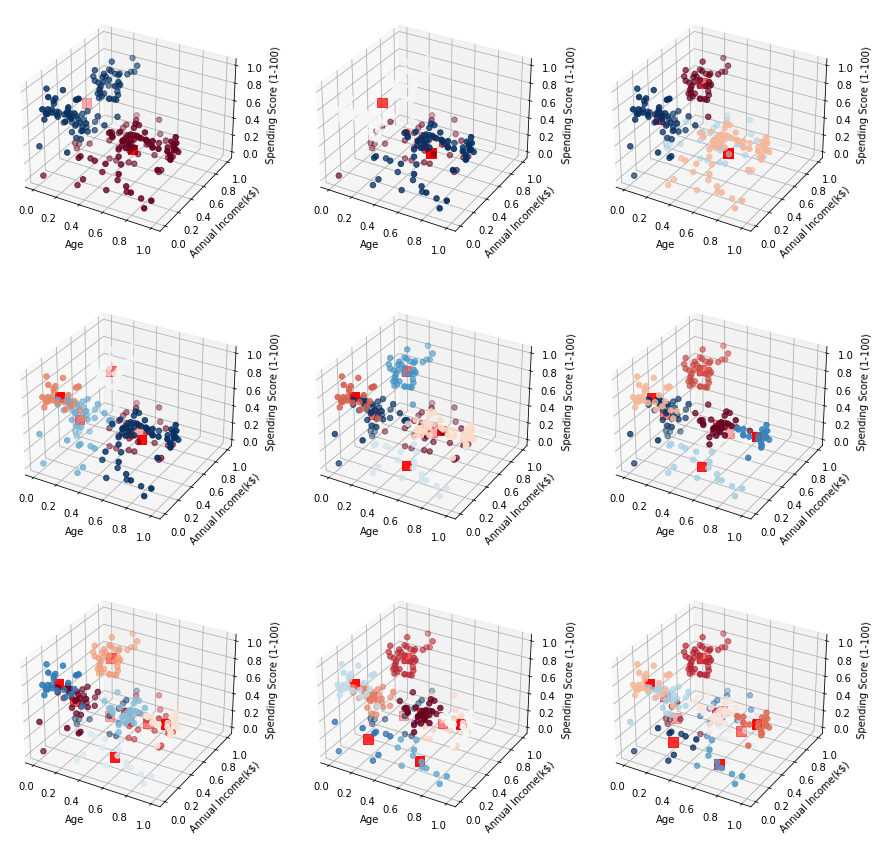

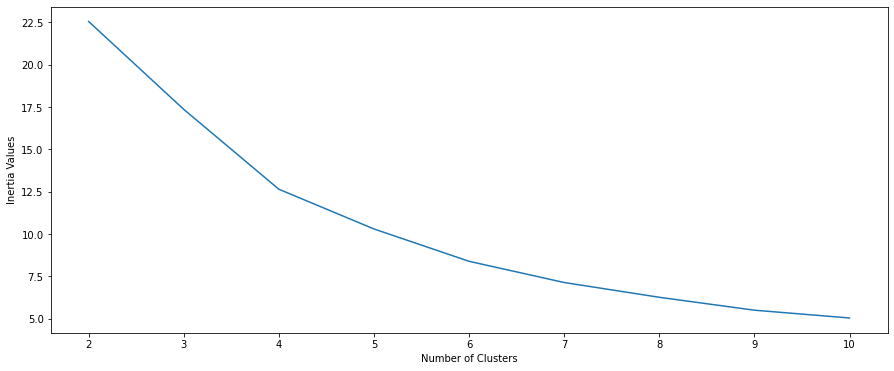

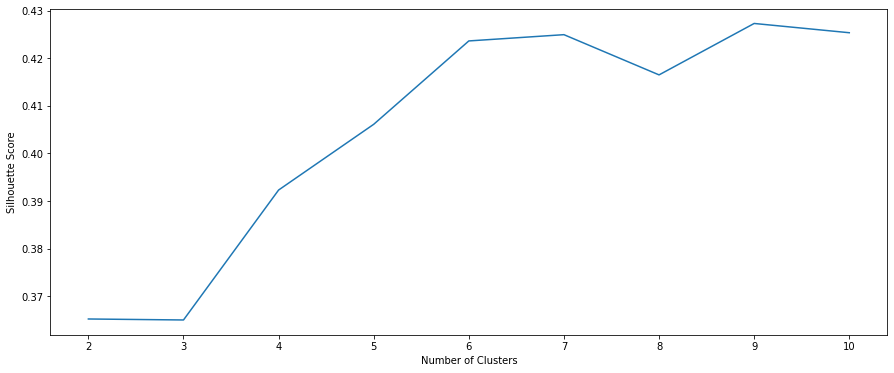

In [20]:
# Spending vs. Age vs. Annual Income by different number of clusters
X3_inertia_values = []
X3_silhouette_scores = []
fig = plt.figure(figsize=(15,15))
for i in range (2,11):
    X3_inertia, X3_label, X3_centroids, X3_silhouette = KMeans_Algorithm(X3, i)
    X3_inertia_values.append(X3_inertia)
    X3_silhouette_scores.append(X3_silhouette)
    centroids_df = pd.DataFrame(X3_centroids, columns =['X', 'Y', 'Z'])
    ax = fig.add_subplot(330 + i - 1, projection='3d')
    ax.scatter(df["scaled_Age"],df["scaled_Annual Income (k$)"],df["scaled_Spending Score (1-100)"], s = 30, c = df["label"], cmap = "RdBu")
    ax.scatter(centroids_df['X'], centroids_df['Y'], centroids_df['Z'], s = 90, marker= ",", color = "r")
    ax.set_xlabel("Age")
    ax.set_ylabel("Annual Income(k$)")
    ax.set_zlabel("Spending Score (1-100)")
    
# plot inertia values against number of clusters
plt.figure(11 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , X3_inertia_values , '-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Values")

# plot inertia values against number of clusters
plt.figure(12, figsize=(15,6))
plt.plot(np.arange(2,11) , X3_silhouette_scores, '-')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

# DBSCAN Comparison

[0.05 0.07 0.09 0.11 0.13 0.15 0.17 0.19]


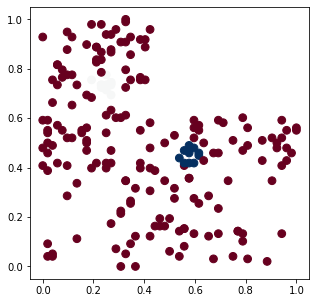

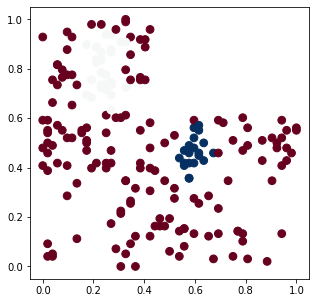

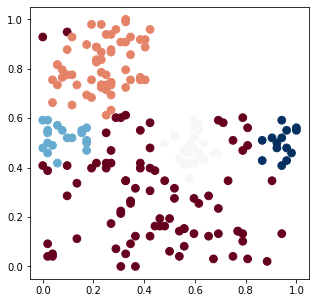

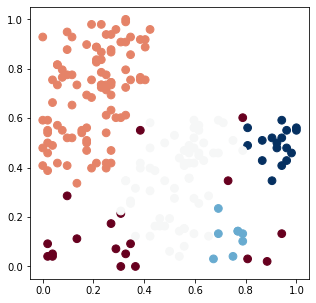

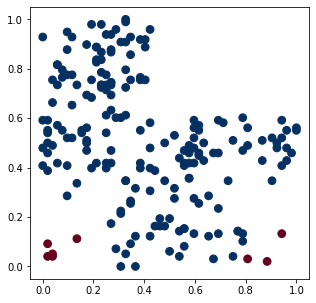

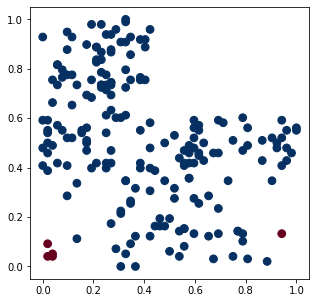

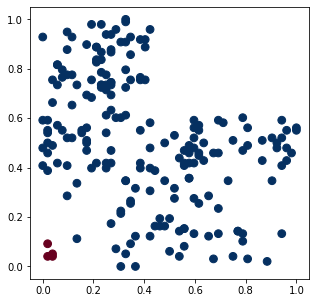

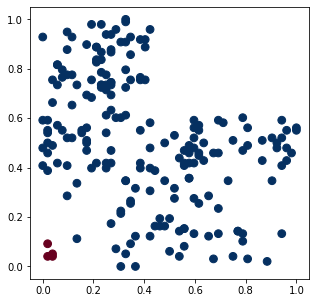

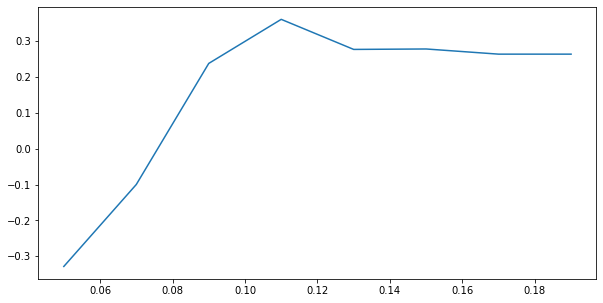

In [21]:
## DBSCAN clustering

from sklearn.cluster import DBSCAN
from sklearn import metrics

silhouette_score_list = []
eps_list = np.arange(0.05, 0.2, 0.02)
print(eps_list)

for i in eps_list:
    j = i * 100
    clustering_DBSCAN = DBSCAN(eps=i, min_samples=10).fit(X1)
    label = clustering_DBSCAN.labels_
    df["label"] = label
    score = metrics.silhouette_score(X1, clustering_DBSCAN.labels_)
    silhouette_score_list.append(score)
    plt.figure(j, figsize=(5,5))
    plt.scatter(df["scaled_Age"], df["scaled_Spending Score (1-100)"], s = 60, c = df["label"], cmap = "RdBu")

plt.figure(figsize=(10,5))
plt.plot(eps_list, silhouette_score_list, '-')

Text(0, 0.5, 'Spending Score (1-100)')

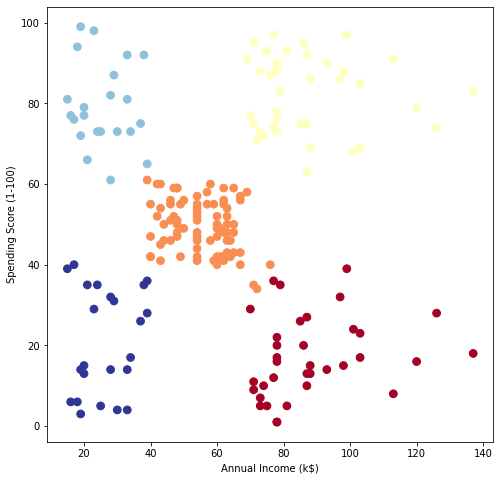

In [22]:
# Spending vs. Annual Income with original scale - five clusters

X2_inertia, X2_label, X2_centroids, X2_silhouette  = KMeans_Algorithm(X2, 5)
X2_inertia_values.append(X2_inertia)
X2_silhouette_scores.append(X2_silhouette)
plt.figure(figsize = (8,8))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], s = 60, c = df["label"], cmap = "RdYlBu")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")